### import librrary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### select columns

In [2]:
columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

### function  read data and convert to matrix

In [3]:
def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)
    
    # inset column One for theta[0]
    ones = np.ones((x.shape[0],1))
    x = np.hstack([ones, x])
    
    return x,y,data

### function hypothesis 
return probability between 1 and 0
### function predict
if vlue > threshold predict_function return 1

else predict_function return 0

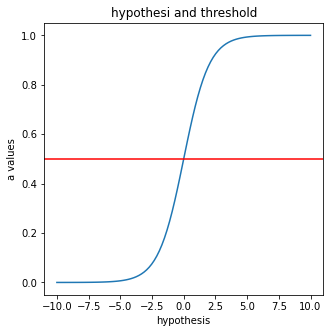

In [4]:
threshold = 0.5

def hypothesis_function(a):
    return 1.0 / (1 + np.exp(-a))

def predict_function(theta, X):
    probability = hypothesis_function(X * theta)
    return [1 if x >= threshold else 0 for x in probability]

def plot_hypothesis_function():
    fig, ax = plt.subplots(figsize=(5,5))
    x = np.linspace(-10, 10, 100)
    ax.plot(x, hypothesis_function(x))
    plt.axhline(y=threshold, color='r', linestyle='-');

    ax.set_xlabel('hypothesis')
    ax.set_ylabel('a values')
    ax.set_title('hypothesi and threshold')
    plt.show()
    
    
plot_hypothesis_function()

### function  cost

In [5]:
def cost_function(x, y, theta):
    m = x.shape[0]
    h = hypothesis_function(np.matmul(x, theta))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

### function  J

In [6]:
def gradient_Descent_function( _x , _y, _theta, _learning_rate):
    m = _x.shape[1]
    h = hypothesis_function(np.matmul(_x, _theta))
    grad = np.matmul(_x.T, (h - _y)) / m;
    _theta = _theta - _learning_rate * grad
    return _theta

### return theta of Gradient Descent binary classifiers of minimall cost and array of all cost

In [7]:
def gradient_Descent_Iterations_function( _x , _y , _learning_rate, _repetition):
    _theta  = np.matrix(np.zeros(_x.shape[1])).reshape([-1, 1])
    costs = np.zeros(_repetition)
    _t = []
    for i in range(_repetition):
        _theta = gradient_Descent_function(_x, _y,_theta, _learning_rate)
        _t.append(_theta)
        costs[i] = cost_function(_x, _y, _theta)
    index_min_cost = np.argmin(costs)
    print("nomber Iterations of minimal cost is ",index_min_cost)
    return _t[index_min_cost] , costs

### function accuracy

In [8]:
def accuracy_function(_y,_p):
    sizeArray = len(_y)
    trueVal = 0
    errorVal = 0
    for i in range(0, sizeArray):
        if _y[i] == _p[i]:
            trueVal += 1
        else:
            errorVal +=1
    accuracy = trueVal*100 / sizeArray
    print ( 
        (
           'true  prediction {1}\n'+
           'wrong prediction {2}\n'+
           'total prediction {3}\n'+
           'accuracy = {0:5.2f}% \n'
        ).format(accuracy,trueVal, errorVal ,sizeArray))

### function plot costs of trining

In [9]:
def plot_cost(_costs):
    index_min_cost = np.argmin(_costs)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.plot(np.arange(len(_costs)), _costs, 'r')
    ax.axvline(x=index_min_cost, color='b', linestyle='-',);
    plt.text(index_min_cost+0.3,2,'Minimal global',rotation=90)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title('Cost vs. Training')
    plt.show()

### plot

In [10]:
def plot_decision_boundary(_ax,_slop,_intercept,n,c):
    x = np.linspace(0, 1, 50)
        
    f = []
    for i in range(0,50):
       v =  _slop + _intercept * x[i]
       if(v > 1):
           f.append(1)
       elif v < 0:
           f.append(0)
       else:
          f.append(v)
    f = np.hstack(np.array(f))
    
    _ax.plot(x, f, c, label="decision boundary room{}".format(n))
    _ax.legend()
    

def plotAll(_data,xName,yName):
    room_1 = _data[_data['room'].isin([1])]
    room_2 = _data[_data['room'].isin([2])]
    room_3 = _data[_data['room'].isin([3])]
    room_4 = _data[_data['room'].isin([4])]
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.scatter(room_1[xName], room_1[yName], s=10, c='r', marker='.', label='room_1')
    ax.scatter(room_2[xName], room_2[yName], s=10, c='g', marker='.', label='room_2')
    ax.scatter(room_3[xName], room_3[yName], s=10, c='b', marker='.', label='room_3')
    ax.scatter(room_4[xName], room_4[yName], s=10, c='y', marker='.', label='room_4')

    ax.legend()
    ax.set_xlabel(xName)
    ax.set_ylabel(yName)
    
    return(ax)


### function run trining and return theta 

In [11]:
paths_ovr= ['../data/data_clean_one_vs_rest_1.csv',
            '../data/data_clean_one_vs_rest_2.csv',
            '../data/data_clean_one_vs_rest_3.csv',
            '../data/data_clean_one_vs_rest_4.csv']

def run_trining(_path,_learning_rate,_n_iterations):
    X,Y,data = redData(_path)
    theta ,costs =gradient_Descent_Iterations_function(X,Y,_learning_rate,_n_iterations)
    print('-- theta of gradientDescent :',_path,'\n',np.squeeze(np.asarray(theta)))
    print('cost  of gradientDescent :',cost_function(X, Y, theta))
    # plot cost vs Training
    plot_cost(costs)
    # plot cost vs Training
    p = predict_function(theta,X)
    accuracy_function(Y, p)
    return theta

### trining model room 1 vs Rest

nomber Iterations of minimal cost is  99
-- theta of gradientDescent : ../data/data_clean_one_vs_rest_1.csv 
 [ 12.69652493 -13.75668774   5.37998922 -10.29771698 -13.76750865
 -12.09363813   2.73275783   0.94576568]
cost  of gradientDescent : [[0.04133135]]


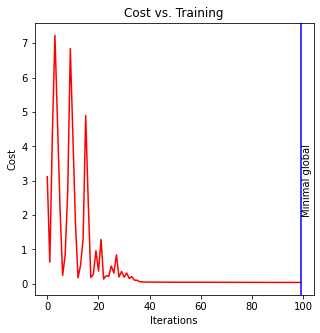

true  prediction 1989
wrong prediction 11
total prediction 2000
accuracy = 99.45% 



In [12]:
theta_room1 = run_trining(paths_ovr[0],0.08,100)

### trining model room 2 vs Rest

nomber Iterations of minimal cost is  99
-- theta of gradientDescent : ../data/data_clean_one_vs_rest_2.csv 
 [-9.45443045 12.03163776 -5.54074648 -6.04152634 11.37353675 -8.95737222
  9.10137613  8.60616612]
cost  of gradientDescent : [[0.04391299]]


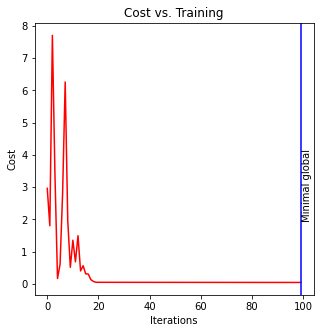

true  prediction 1965
wrong prediction 35
total prediction 2000
accuracy = 98.25% 



In [13]:
theta_room2 = run_trining(paths_ovr[1],0.08,100)

### trining model room 3 vs Rest

nomber Iterations of minimal cost is  55
-- theta of gradientDescent : ../data/data_clean_one_vs_rest_3.csv 
 [-6.19319615  7.35044137  2.70310585 12.85710944  7.93976437 -6.99431909
 -6.10658134 -8.19159351]
cost  of gradientDescent : [[0.52629315]]


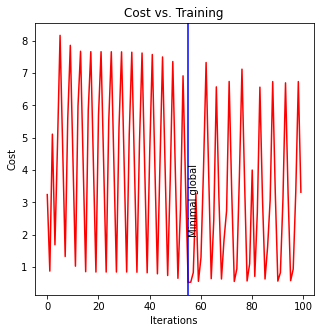

true  prediction 1514
wrong prediction 486
total prediction 2000
accuracy = 75.70% 



In [14]:
theta_room3 = run_trining(paths_ovr[2],0.08,100)

### trining model room 4 vs Rest

nomber Iterations of minimal cost is  99
-- theta of gradientDescent : ../data/data_clean_one_vs_rest_4.csv 
 [-4.39946159 -7.36690725 -1.11294282  7.13847376 -6.74644824 17.59334954
 -9.02362267 -7.64416932]
cost  of gradientDescent : [[0.03052463]]


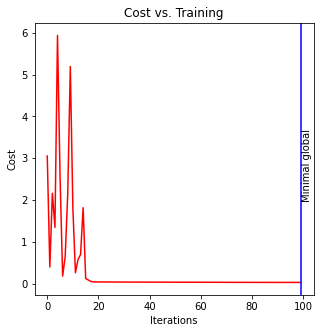

true  prediction 1987
wrong prediction 13
total prediction 2000
accuracy = 99.35% 



In [15]:
theta_room4 = run_trining(paths_ovr[3],0.08,100)

# multi class classification


### all theta in one array

In [16]:
theta_all = [theta_room1,theta_room2,theta_room3,theta_room4,]

### function predict multiClass for new one X

In [17]:
def predict_multiClass(_theta_all,_x_new):
    _probabilities = []
    for i in range(0,len(_theta_all)):
        _probability = hypothesis_function(_x_new * _theta_all[i])
        _probabilities.append(_probability)
    _index_of_max = np.argmax(_probabilities)
    # print('probabilities : ',_probabilities,)
    # print('max probability in index: ',_index_of_max,)
    return _index_of_max + 1 # number of room equel index +1

### testing multi class classification for new x

true  prediction 1908
wrong prediction 92
total prediction 2000
accuracy = 95.40% 



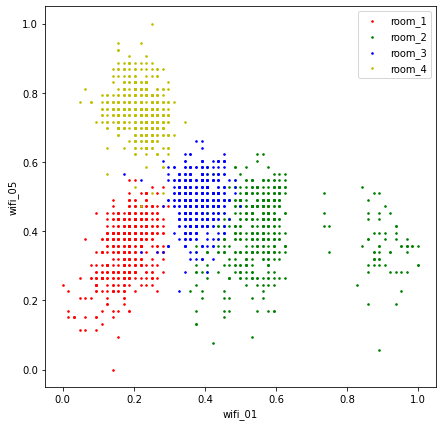

In [18]:
#test for multi class classification all X in dataset
theta_all = [theta_room1,theta_room2,theta_room3,theta_room4,]

X,Y,data = redData('../data/data_clean.csv')

vv= data.corr()
y_predict_rooms =[]
for v in X:
    p=predict_multiClass(theta_all,v)
    y_predict_rooms.append(p)

accuracy_function(Y,y_predict_rooms)

ax = plotAll(data,'wifi_01','wifi_05',)

# plot_decision_boundary(ax,0.8,-1.4,1,'r')
# plot_decision_boundary(ax,-4,10,2,'g')
# plot_decision_boundary(ax,0.4,0,3,'b')
# plot_decision_boundary(ax,0.4,1,4,'y')